In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler
# from google.colab import drive
# drive.mount('/content/drive')
# Loading dataset
#data1 = pd.read_csv("/content/UNSW_NB15_training-set.csv")
data2 = pd.read_csv("/content/UNSW_NB15_testing-set.csv")

#print(data1.shape)
print(data2.shape)



(124587, 45)


In [2]:
# using testing set for training model
data=data2

In [3]:
# Identify non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=['number']).columns.tolist()

# Handling missing values
data = data.dropna()
data = data.drop(columns=["id"])

# Encode categorical variables/features
categorical_columns = ["proto", "service", "state"] + non_numeric_columns
label_encoders = {}

for col in categorical_columns:
    if col != 'label':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Encode the label column using Label Encoding
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

X = data.drop(columns=["label"])
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling using SMOTE
oversampler = SMOTE(sampling_strategy='auto', random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124586 entries, 0 to 124585
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                124586 non-null  float64
 1   proto              124586 non-null  int64  
 2   service            124586 non-null  int64  
 3   state              124586 non-null  int64  
 4   spkts              124586 non-null  int64  
 5   dpkts              124586 non-null  int64  
 6   sbytes             124586 non-null  int64  
 7   dbytes             124586 non-null  int64  
 8   rate               124586 non-null  float64
 9   sttl               124586 non-null  int64  
 10  dttl               124586 non-null  int64  
 11  sload              124586 non-null  float64
 12  dload              124586 non-null  float64
 13  sloss              124586 non-null  int64  
 14  dloss              124586 non-null  int64  
 15  sinpkt             124586 non-null  float64
 16  di

In [5]:
data.describe()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,124586.000000,124586.000000,124586.000000,124586.000000,124586.000000,124586.000000,1.245860e+05,1.245860e+05,1.245860e+05,124586.000000,...,124586.000000,124586.000000,124586.000000,124586.000000,124586.000000,124586.000000,124586.000000,124586.000000,124586.000000,124586.000000
mean,1.536800,107.297481,1.499246,2.157474,25.094874,24.677741,1.031738e+04,1.946136e+04,6.121632e+04,154.262405,...,1.711870,4.422600,0.018469,0.018469,0.161021,4.127502,4.977052,0.022169,4.692036,0.550511
std,6.685569,24.641724,2.558721,0.918056,146.877172,120.948556,1.867713e+05,1.580637e+05,1.401399e+05,108.590884,...,2.665589,6.100913,0.140590,0.140590,0.808624,5.272571,6.030915,0.147235,1.723370,0.497444
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000009,113.000000,0.000000,2.000000,2.000000,0.000000,2.000000e+02,0.000000e+00,2.735654e+01,31.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000
50%,0.047976,113.000000,0.000000,2.000000,10.000000,6.000000,7.560000e+02,3.040000e+02,7.234105e+02,254.000000,...,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,6.000000,1.000000
75%,0.834194,119.000000,2.000000,3.000000,18.000000,18.000000,2.036000e+03,1.910000e+03,1.111111e+05,254.000000,...,1.000000,5.000000,0.000000,0.000000,0.000000,4.000000,6.000000,0.000000,6.000000,1.000000
max,59.999989,132.000000,12.000000,8.000000,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,...,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,9.000000,1.000000


<Axes: >

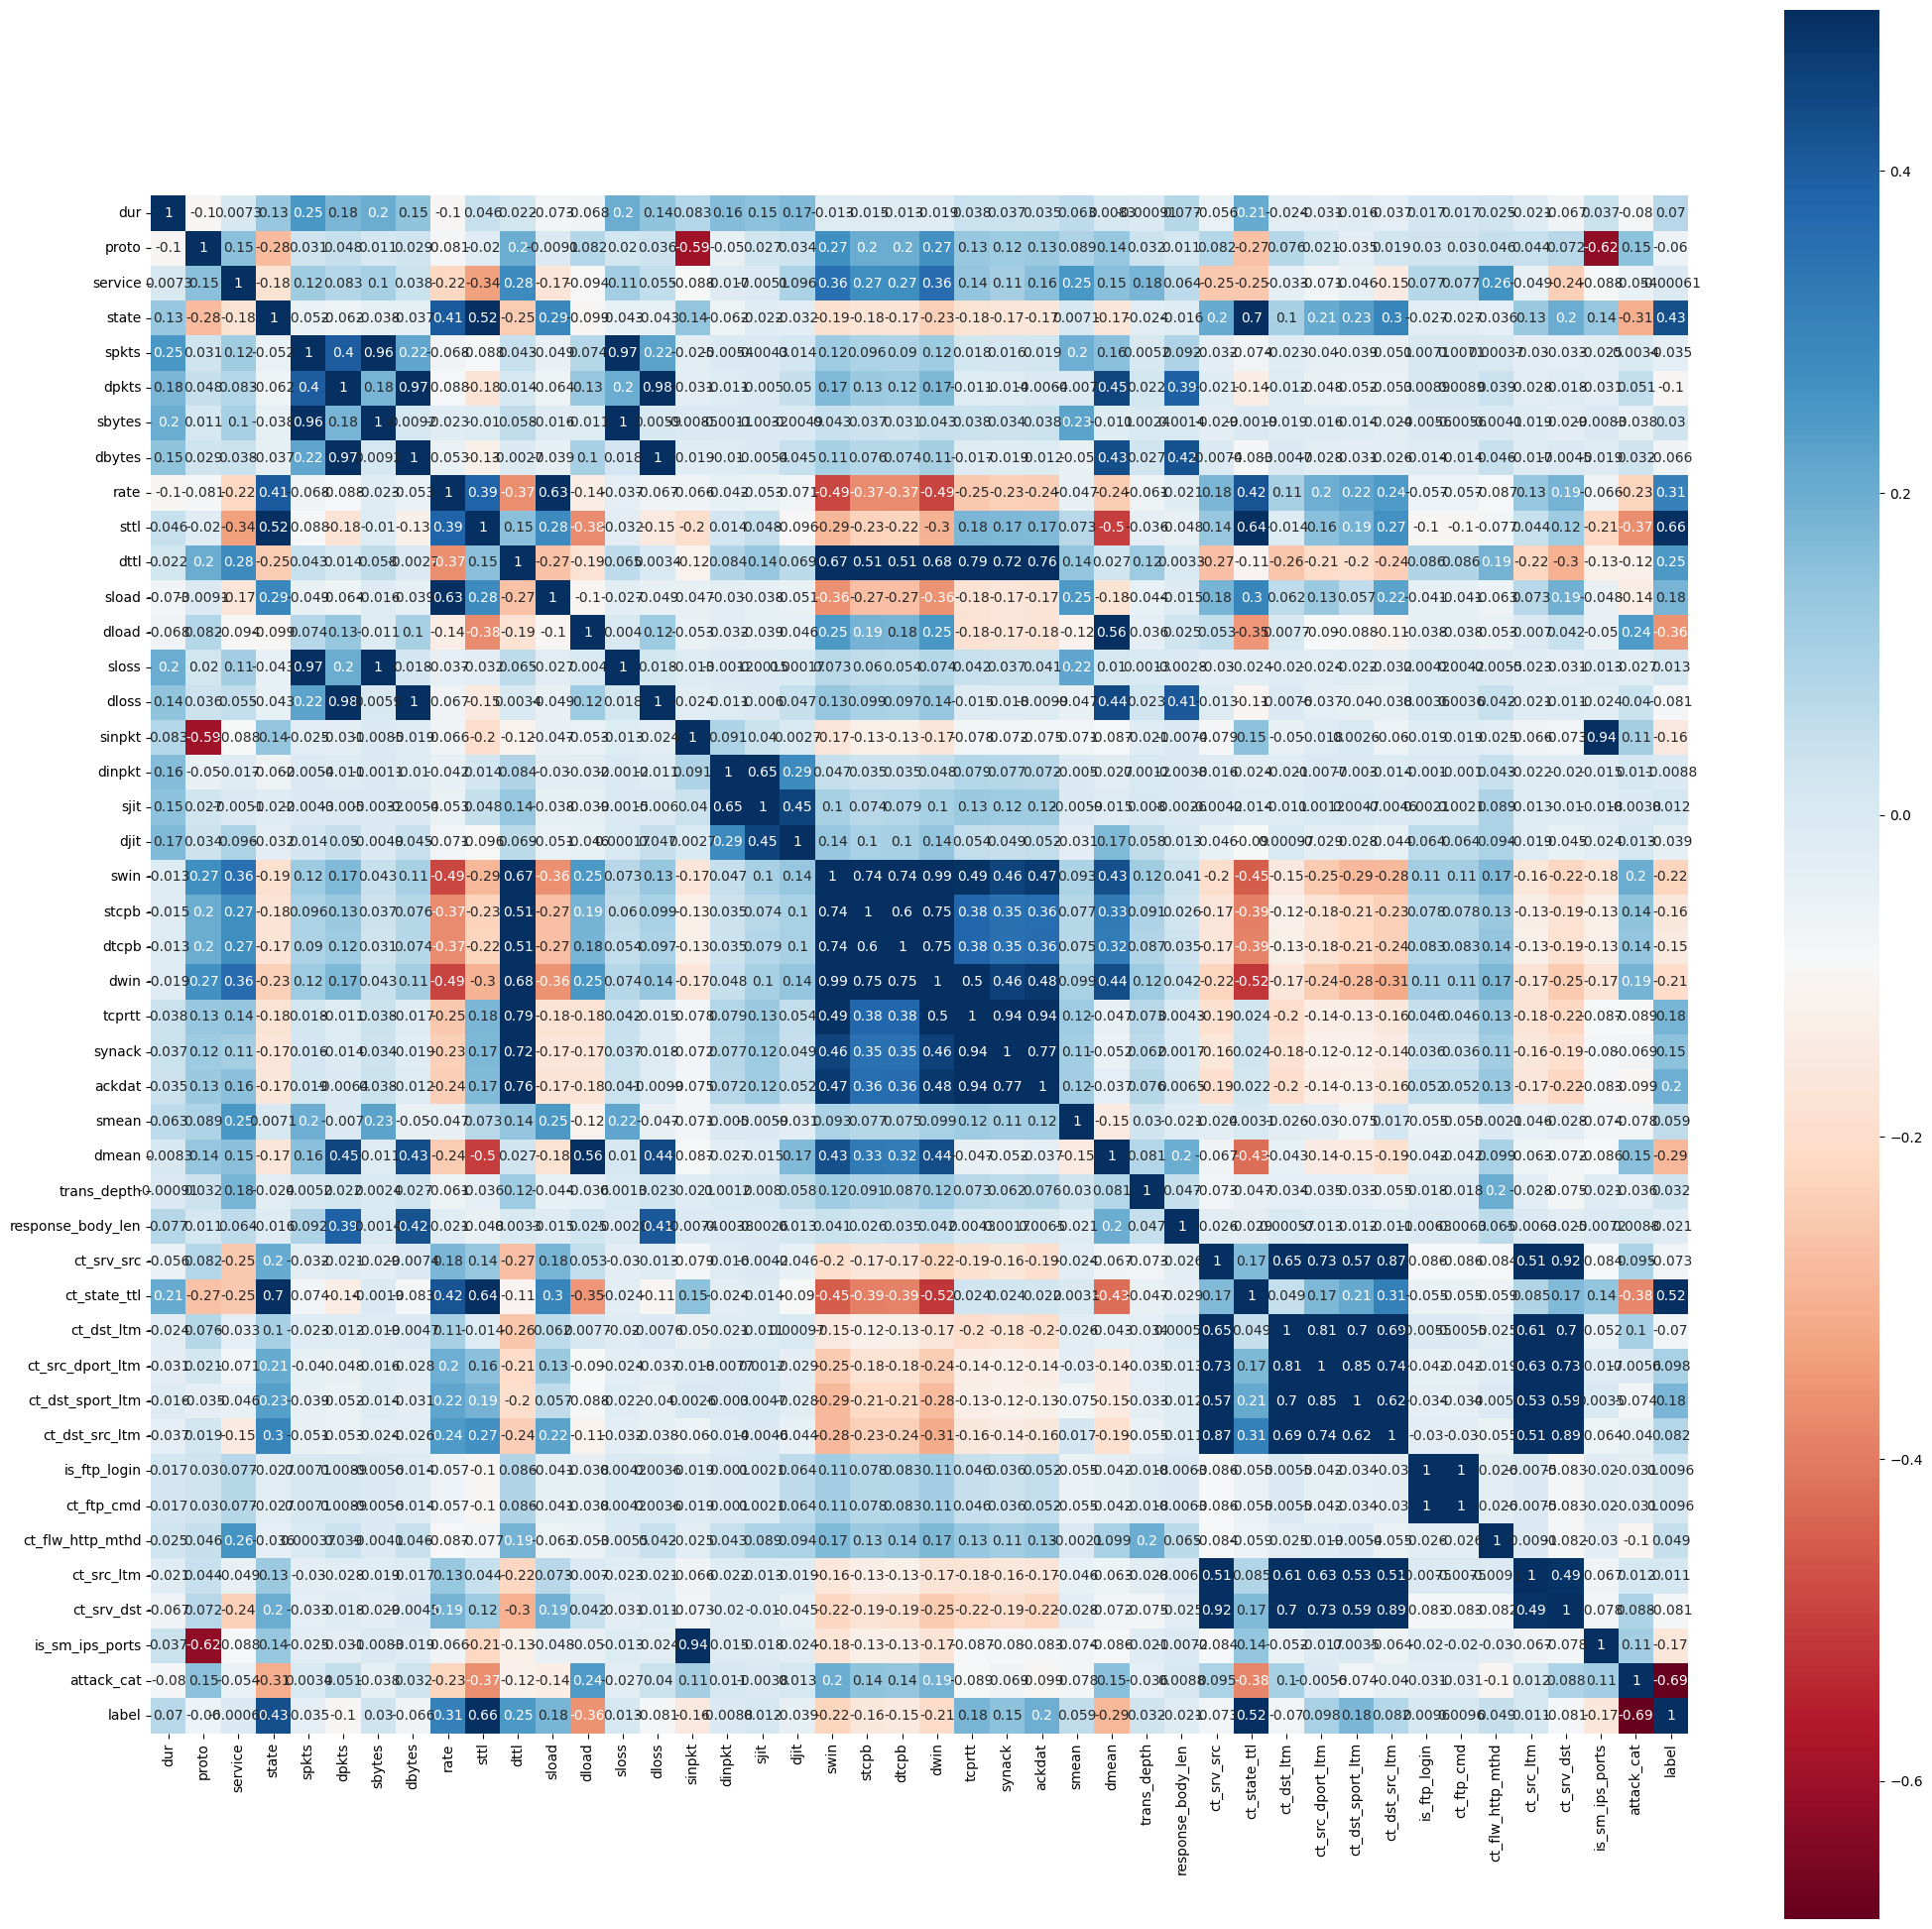

In [6]:
# newdata=data
# newdata=newdata.pivot('dur','proto','service','dur',	'proto',	'service',	'state',	'spkts',	'dpkts',	'sbytes',	'dbytes'	,'rate'	,'sttl','attack_cat','label')
corrmat=data.corr()
f,ax=plt.subplots(figsize=(25,25))
sns.heatmap(corrmat,vmax=0.5,annot=True,square=True,cmap="RdBu")

array([[<Axes: title={'center': 'dur'}>,
        <Axes: title={'center': 'attack_cat'}>],
       [<Axes: title={'center': 'service'}>,
        <Axes: title={'center': 'rate'}>],
       [<Axes: title={'center': 'sload'}>,
        <Axes: title={'center': 'sloss'}>]], dtype=object)

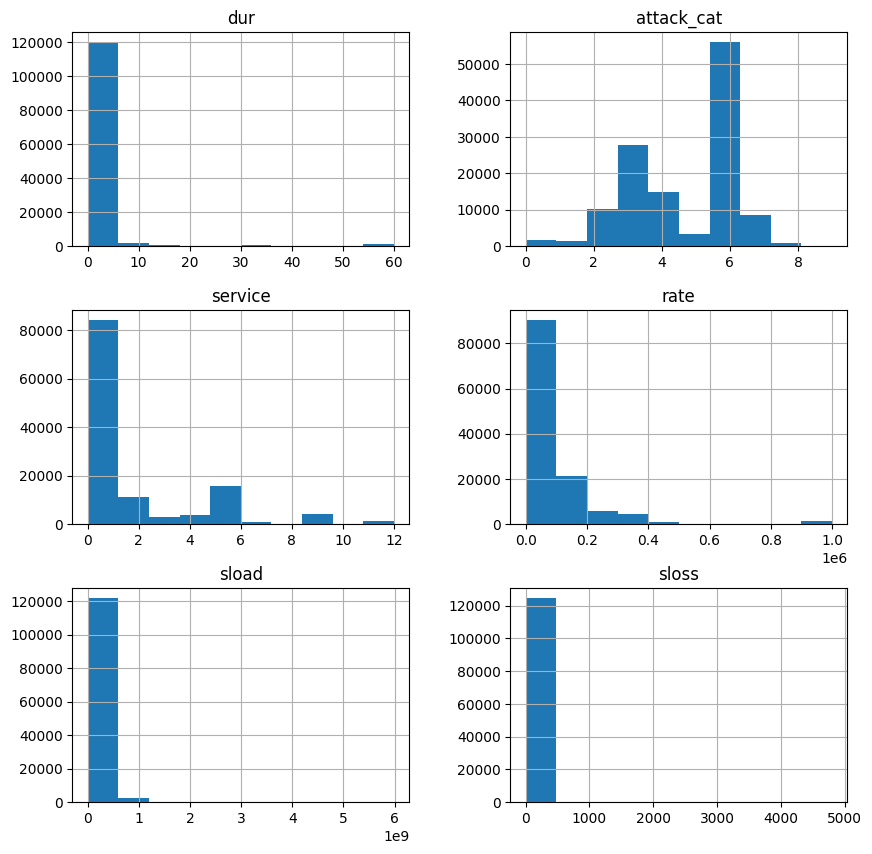

In [7]:
data[['dur','attack_cat','service','rate','sload','sloss']].hist(figsize=(10,10))

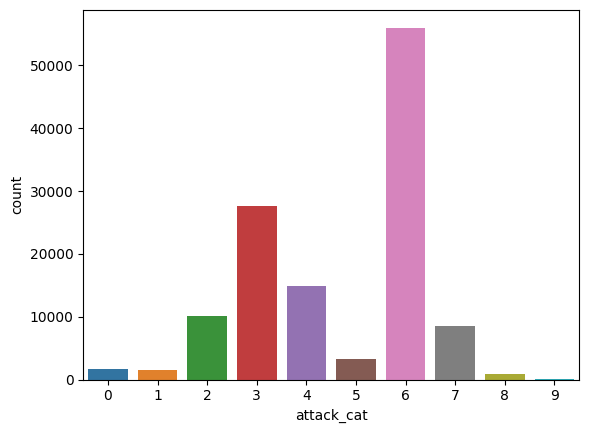

In [8]:
sns.countplot(x='attack_cat',data=data)
plt.show()

In [9]:
# Importing necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression  # You can replace this with your preferred model

# Training a ML model on the oversampled data
model = LogisticRegression()
model.fit(X_train_oversampled, y_train_oversampled)

# Predict on the test set
y_pred_oversampled = model.predict(X_test)

# Evaluate the model
accuracy_oversampled = accuracy_score(y_test, y_pred_oversampled)
precision_oversampled = precision_score(y_test, y_pred_oversampled)
recall_oversampled = recall_score(y_test, y_pred_oversampled)
f1_oversampled = f1_score(y_test, y_pred_oversampled)
roc_auc_oversampled = roc_auc_score(y_test, y_pred_oversampled)

# Print metrics for oversampled data
print("Metrics for Oversampled Data:")
print(f"Accuracy: {accuracy_oversampled:.2f}")
print(f"Precision: {precision_oversampled:.2f}")
print(f"Recall: {recall_oversampled:.2f}")
print(f"F1-Score: {f1_oversampled:.2f}")
print(f"ROC AUC: {roc_auc_oversampled:.2f}")

# Classification report for logistic regresion on oversampled data
classification_report_oversampled = classification_report(y_test, y_pred_oversampled)
print("Classification Report for Oversampled Data:")
print(classification_report_oversampled)


Metrics for Oversampled Data:
Accuracy: 0.80
Precision: 0.76
Recall: 0.94
F1-Score: 0.84
ROC AUC: 0.79
Classification Report for Oversampled Data:
              precision    recall  f1-score   support

           0       0.89      0.64      0.75     11390
           1       0.76      0.94      0.84     13528

    accuracy                           0.80     24918
   macro avg       0.83      0.79      0.79     24918
weighted avg       0.82      0.80      0.80     24918



In [ ]:

from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Creating and training the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

# predictions on the test set
y_pred = svm_model.predict(X_test)

# Print classification report for SVM
report = classification_report(y_test, y_pred)
print(report)
